## Plotting in python

We first import the libraries that we will use


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

#### Read in the csv or excel files containing our data

In [2]:
path = r'data/' # we use a raw string here.The "\" is an escape
                                # character in python, so this is necessary.

# read in the data as a pandas.DataFrame()
df = pd.read_csv(path + '10-18-18-Al-LLZTO-sinter 1140 90min.csv')

#### Look at the data to make sure everything is right.

In [3]:
df.head()

,x,y_obs,weight,y_calc,y_bkg
0,15.002,43.0,0.02326,45.803,45.172
1,15.018,40.0,0.02500,45.812,45.170
2,15.034,44.0,0.02273,45.821,45.167
3,15.050,43.0,0.02326,45.830,45.165
4,15.066,39.0,0.02564,45.839,45.162


#### Define variables we can use for plotting.

In [4]:
x_data = df['x']
y_obs = df['y_obs']
y_fit = df['y_calc']
y_bkg = df['y_bkg']

#### Plot the data

Lets make a simple plot of the XRD data

For this plot we wont define anything about figure. Instead we will let plt.plot() function use default treatment when making the figure.

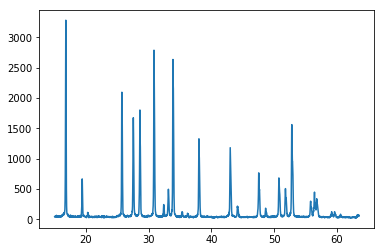

In [5]:
plt.plot(x_data, y_obs)

#### Add axis labels and legend

Okay, great. Now lets add tome axis labels and a legend

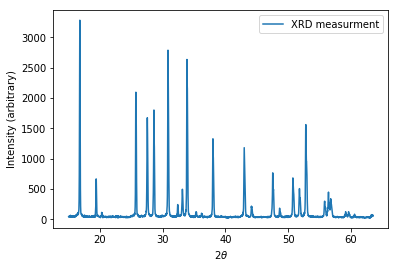

In [6]:
plt.plot(x_data, y_obs, label='XRD measurment') # plot data
plt.xlabel('2$\\theta$')  # label the x axis
plt.ylabel('Intensity (arbitrary)')  # label the y axis
plt.legend()  # add the legend (will default to 'best' location)

#### Add a scond line to the graph

We should now add the best fit line. 

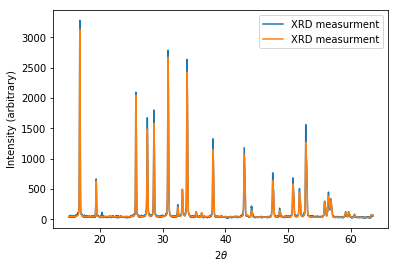

In [7]:
plt.plot(x_data, y_obs, label='XRD measurment') # plot data

plt.plot(x_data, y_fit, label='XRD measurment')  # This second line adds an additional line to the plot

plt.xlabel('2$\\theta$')  # label the x axis
plt.ylabel('Intensity (arbitrary)')  # label the y axis
plt.legend()  # add the legend (will default to 'best' location)

#### Increase figure size, Change tick marks. Change color and linestyle.

The figure looks better now, but there are still plenty of aspects we can customized. Lets now make it larger, update the color of the fit line, and change the type of fit line, and make increase the observation linewidth. 

We can also add tickts to the top and right axis while flipping them inward.

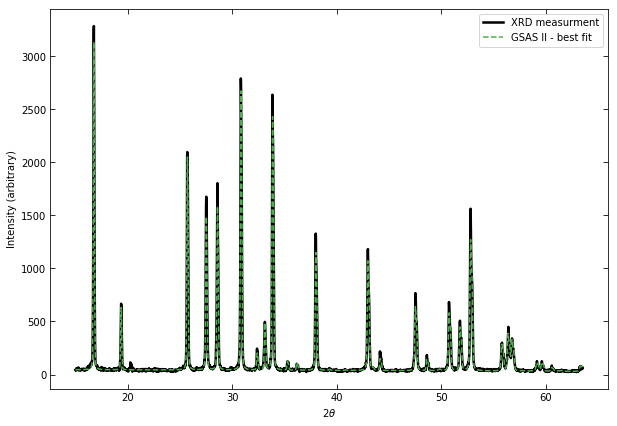

In [8]:
plt.figure(1, figsize=(10, 7))

#Add color (hexadecimal), linestyle, linewidth
plt.plot(x_data,
         y_obs,
         label='XRD measurment',
         color='k',
         linestyle='-',
         linewidth=2.5)

plt.plot(x_data,
         y_fit,
         label='GSAS II - best fit',
         color='#4daf4a',  # add a custom coloring to the fit
         linestyle='--',  # change the line style to dashed
         linewidth=1.5)  # This second line adds an additional line to the plot


plt.xlabel('2$\\theta$')  # label the x axis
plt.ylabel('Intensity (arbitrary)')  # label the y axis
plt.legend()  # add the legend (will default to 'best' location)

# change the tick parameters
plt.tick_params(direction='in',
                length=5,
                bottom=True,
                top=True,
                left=True,
                right=True)

#### Add the residual as a subplot

This looks fine, but now we want to see the residual. We could plot that on the same plot, but the results are bit super clear

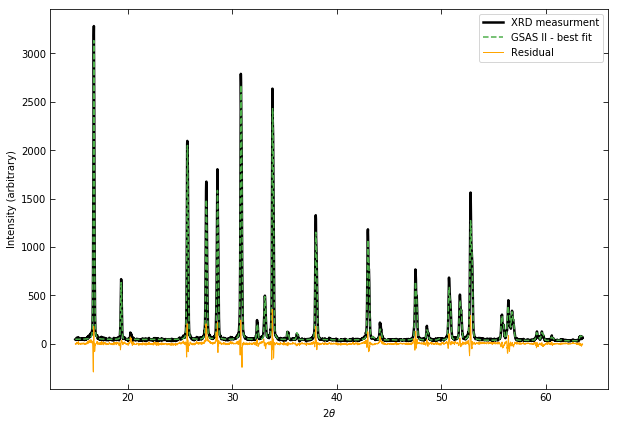

In [9]:
# This lines designates a figure (1) and sets the size in inches ((10 in x 7 in))
plt.figure(1, figsize=(10, 7))

#Add color (hexadecimal), linestyle, linewidth
plt.plot(x_data,
         y_obs,
         label='XRD measurment',
         color='k',
         linestyle='-',
         linewidth=2.5)

plt.plot(x_data,
         y_fit,
         label='GSAS II - best fit',
         color='#4daf4a',  # add a custom coloring to the fit
         linestyle='--',  # change the line style to dashed
         linewidth=1.5)  # This second line adds an additional line to the plot


plt.plot(x_data,
         (y_obs - y_fit),
         label='Residual',
         color='orange',  # add a custom coloring to the fit
         linestyle='-',  # change the line style to dashed
         linewidth=1)  # This second line adds an additional line to the plot

plt.xlabel('2$\\theta$')  # label the x axis
plt.ylabel('Intensity (arbitrary)')  # label the y axis
plt.legend()  # add the legend (will default to 'best' location)

# change the tick parameters
plt.tick_params(direction='in',
                length=5,
                bottom=True,
                top=True,
                left=True,
                right=True)



#### Using a subplot

Up to this point, we have been plotting on the entire canvas. If we want, we can partition the canvas to allow for mutiple subplots. For example, instead of plotting the residual on the same scale as the measured and fit values, we add a new subplot that better highlight the error below.

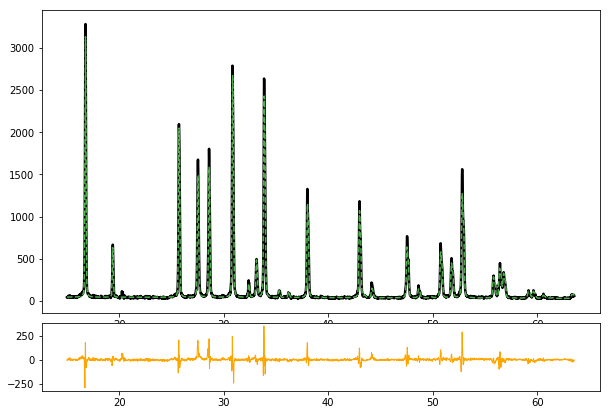

In [10]:
# for this part we are going to umport the gridspec 'Tool' this 
# will allow us to create custom partitions to the canvas
import matplotlib.gridspec as gridspec

# define the figure canvas we will be working on
fig = plt.figure(1, figsize=(10,7))

# define the gride for our subplots (5 rows, 3 columns)
gs = gridspec.GridSpec(5,3)

# update the padding used for each grid partition
gs.update(wspace=0.25, hspace=0.15)

# add a subplot (saved to the variable xrd_plot) to the figure that occupies rows 0-4, and columns 0:3 
xrd_plot = fig.add_subplot(gs[0:4, 0:3])

# add the XRD measurment data
xrd_plot.plot(x_data,
         y_obs,
         label='XRD measurment',
         color='k',
         linestyle='-',
         linewidth=2.5)

# add the XRD fit data
xrd_plot.plot(x_data,
         y_fit,
         label='GSAS II - best fit',
         color='#4daf4a',  # add a custom coloring to the fit
         linestyle='--',  # change the line style to dashed
         linewidth=1.5)  # This second line adds an additional line to the plot

# create a similar subplot to hold the residual figure. THis occupies row 5, and columns 0:3
residual_plot = fig.add_subplot(gs[4:5, 0:3])

# add the Residual data
residual_plot.plot(x_data,
         (y_obs - y_fit),
         label='Residual',
         color='orange',  # add a custom coloring to the fit
         linestyle='-',  # change the line style to dashed
         linewidth=1)  # This second line adds an additional line to the plot


#### Cleaning up the subplot

At this point, we the plot looks better, but there are still some issues. For one thing, we lost the formating we had applied. This is a simple fix though, we simply format each subplot like we did the earlier figures. 

For this part, lets remove the xlabel on the xrd_plot, fix the tick marks, and add labels to the x and y axis. You can update a subplot after calling it, but before creating another one. The following code will do the trick for the xrd_plot.


```python
# add a label to the y axis
plt.ylabel('Intensity (Arbitrary Units)')

# set the range of x & y values
plt.xlim(14, 66)
plt.ylim(-0, 3500)

# add x_ticks with the from 15-66 at intervals of 5 (ie. 15, 20, ....., 65)
plt.xticks(np.arange(15, 66, 5))

# remove tick labels on the xaxis
plt.tick_params(labelbottom=False)

# add a legend
plt.legend()

# add tick marks to all edges and set to face inward
plt.tick_params(direction='in', length=10, bottom=True, top=True, left=True, right=True)
```



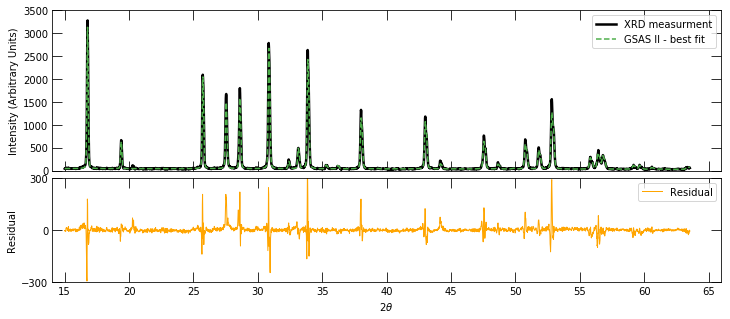

In [11]:
# define the figure canvas we will be working on
fig = plt.figure(1, figsize=(12, 5))

# define the gride for our subplots (5 rows, 3 columns)
gs = gridspec.GridSpec(5,3)

# update the padding used for each grid partition
gs.update(wspace=0.25, hspace=0.15)

# add a subplot (saved to the variable xrd_plot) to the figure that occupies rows 0-4, and columns 0:3 
xrd_plot = fig.add_subplot(gs[0:3, 0:3])

# add the XRD measurment data
xrd_plot.plot(x_data,
         y_obs,
         label='XRD measurment',
         color='k',
         linestyle='-',
         linewidth=2.5)

# add the XRD fit data
xrd_plot.plot(x_data,
         y_fit,
         label='GSAS II - best fit',
         color='#4daf4a',  # add a custom coloring to the fit
         linestyle='--',  # change the line style to dashed
         linewidth=1.5)  # This second line adds an additional line to the plot

####### ADD FORMATING TO SUBPLOT ########
### plt.label will set the label for the active plot.
### Because no other plot has been called yet, xrd_plot
### will be updated with the deried format.

# add a label to the y axis
plt.ylabel('Intensity (Arbitrary Units)')

# set the range of x & y values
plt.xlim(14, 66)
plt.ylim(-0, 3500)

# add x_ticks with the from 15-66 at intervals of 5 (ie. 15, 20, ....., 65)
plt.xticks(np.arange(15, 66, 5))

# remove tick labels on the xaxis

xrd_plot.tick_params(labelbottom=False)

# add a legend
plt.legend()

# add tick marks to all edges and set to face inward
plt.tick_params(direction='in', length=10, bottom=True, top=True, left=True, right=True)
#########################################


# create a similar subplot to hold the residual figure. THis occupies rows 4-5, and columns 0:3
residual_plot = fig.add_subplot(gs[3:5, 0:3])

# add the Residual data
residual_plot.plot(x_data,
         (y_obs - y_fit),
         label='Residual',
         color='orange',  # add a custom coloring to the fit
         linestyle='-',  # change the line style to dashed
         linewidth=1)  # This second line adds an additional line to the plot

####### ADD FORMATING TO SUBPLOT ########

# add a label to the x & y axis
plt.xlabel('2$\\theta$')
plt.ylabel('Residual')

# set the range of x & y values
plt.xlim(14, 66)
plt.ylim(-300, 300)

# add xticks with the from 15-66 at intervals of 5 (ie. 15, 20, ....., 65)
plt.xticks(np.arange(15, 66, 5))
# add y ticks
plt.yticks([-300, 0, 300])


# add a legend
plt.legend()

# add tick marks to all edges and set to face inward
plt.tick_params(direction='in', length=10, bottom=True, top=True, left=True, right=True)


#### Using custom colors and adding markers

We can go through and update all the colors in our figure to match a specific color palette. To do this, we can define a list or dictionary that holds the colors we would like to use. For this figure, lets look at a color palette from: http://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=7.

Here we define a list to hold some recommended colors. Now whenever we want to use a color, we can select an i'th item from the list using the operation `list[i]` (remember our index starts at zero).
```
color_palette = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']

color_palette[0] = '#1b9e77'
```



The figure looks pretty good at this point, but maybe it would be better to show the measurments at the descrete points, and the fit as a continuous function. While we are at it, lets look at easy ways for defining and using a color palette.

To change the XRD measurment from a continuous lines to points, we update to following code replacing `linestyle='-'` with `linestyle='none'`, and adding the argument `marker='o'`. We will also update the marker size (`markersize=1`), the marker face color (`mfc=none`) and the marker edge width (`mew=1`)

```python
# add the XRD measurment data
xrd_plot.plot(x_data,
        y_obs,
        label='XRD measurment',
        color='none',
        linestyle='none',
        marker='o',
        markersize=3,
        markerfacecolor='none',
        markeredgewidth=0.5,
        markeredgecolor=color_palette[0],
        linewidth=2.5)
```



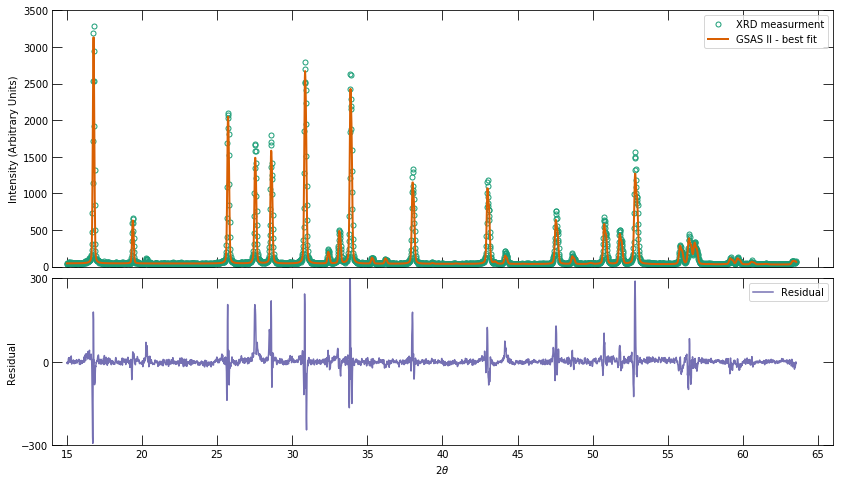

In [12]:
# define the color pallet we will use
color_palette = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']

# define the figure canvas we will be working on
fig = plt.figure(1, figsize=(14, 8))

# define the gride for our subplots (5 rows, 3 columns)
gs = gridspec.GridSpec(5,3)

# update the padding used for each grid partition
gs.update(wspace=0.25, hspace=0.15)

# add a subplot (saved to the variable xrd_plot) to the figure that occupies rows 0-4, and columns 0:3 
xrd_plot = fig.add_subplot(gs[0:3, 0:3])

# add the XRD measurment data
xrd_plot.plot(x_data,
        y_obs,
        label='XRD measurment',
        color='none',
        linestyle='none',
        marker='o',
        markersize=5,
        markerfacecolor='none',
        markeredgewidth=1,
        markeredgecolor=color_palette[0],
        linewidth=2.5)

# add the XRD fit data
xrd_plot.plot(x_data,
         y_fit,
         label='GSAS II - best fit',
         color=color_palette[1],  # add a custom coloring to the fit
         linestyle='-',  # change the line style to dashed
         linewidth=2)  # This second line adds an additional line to the plot

# add a label to the y axis
plt.ylabel('Intensity (Arbitrary Units)')

# set the range of x & y values
plt.xlim(14, 66)
plt.ylim(-0, 3500)

# add x_ticks with the from 15-66 at intervals of 5 (ie. 15, 20, ....., 65)
plt.xticks(np.arange(15, 66, 5))

# remove tick labels on the xaxis
plt.tick_params(labelbottom=False)

# add a legend
plt.legend()

# add tick marks to all edges and set to face inward
plt.tick_params(direction='in', length=10, bottom=True, top=True, left=True, right=True)


# create a similar subplot to hold the residual figure. THis occupies rows 4-5, and columns 0:3
residual_plot = fig.add_subplot(gs[3:5, 0:3])

# add the Residual data
residual_plot.plot(x_data,
         (y_obs - y_fit),
         label='Residual',
         color=color_palette[2],  # add a custom coloring to the fit
         linestyle='-',  # change the line style to dashed
         linewidth=1.5)  # This second line adds an additional line to the plot

# add a label to the x & y axis
plt.xlabel('2$\\theta$')
plt.ylabel('Residual')

# set the range of x & y values
plt.xlim(14, 66)
plt.ylim(-300, 300)

# add xticks with the from 15-66 at intervals of 5 (ie. 15, 20, ....., 65)
plt.xticks(np.arange(15, 66, 5))
# add y ticks
plt.yticks([-300, 0, 300])

# add a legend
plt.legend()

# add tick marks to all edges and set to face inward
plt.tick_params(direction='in', length=10, bottom=True, top=True, left=True, right=True)


#### Add text to the figure
Lets suppose we want to label our peaks. This XRD has two phases. We can read in the data for these phases and labels them. This can be easily done by adding the following lines of code:
```python
phase_1 = pd.read_csv('phase_1.csv')
phase_2 = pd.read_csv('phase_2.csv')

'''
....

....

....

....

'''

for peak_location in phase_1:
    plt.text(phase_1['x_location'], y_location, 'phase_1')
    
for peak_location in phase_2:
    plt.text(phase_2['x_location'], y_location, 'phase_2')

```

text formatting can be customized. For options see: https://matplotlib.org/api/text_api.html#matplotlib.text.Text


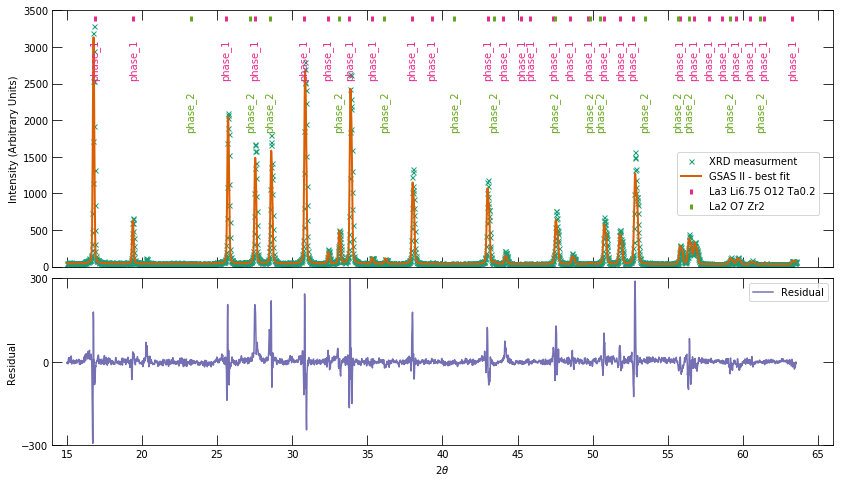

In [30]:
# read in the location of our peaks
phase_1 = pd.read_csv(path + 'Phase La3 Li6.75 O12 Ta0.2.csv', header=None)
phase_1.columns = ['x', 'y']
phase_2 = pd.read_csv(path + 'Phase La2 O7 Zr2.csv', header=None)
phase_2.columns = ['x', 'y']

# define the color pallet we will use
color_palette = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']

# define the figure canvas we will be working on
fig = plt.figure(1, figsize=(14, 8))

# define the gride for our subplots (5 rows, 3 columns)
gs = gridspec.GridSpec(5,3)

# update the padding used for each grid partition
gs.update(wspace=0.25, hspace=0.15)

# add a subplot (saved to the variable xrd_plot) to the figure that occupies rows 0-4, and columns 0:3 
xrd_plot = fig.add_subplot(gs[0:3, 0:3])

# add the XRD measurment data
xrd_plot.plot(x_data,
        y_obs,
        label='XRD measurment',
        color='none',
        linestyle='none',
        marker='x',
        markersize=5,
        markerfacecolor='none',
        markeredgewidth=1,
        markeredgecolor=color_palette[0],
        linewidth=2.5)

# add the XRD fit data
xrd_plot.plot(x_data,
        y_fit,
        label='GSAS II - best fit',
        color=color_palette[1],  # add a custom coloring to the fit
        linestyle='-',  # change the line style to dashed
        linewidth=2)  # This second line adds an additional line to the plot

# add ticks for phases
xrd_plot.plot(phase_1['x'],
        phase_1['x']*0+3400,
        label='La3 Li6.75 O12 Ta0.2',
        color=color_palette[3],  # add a custom coloring to the fit
        linestyle='none',  # change the line style to dashed
        marker='|',
        markersize=5,
        markeredgewidth=3)  # This second line adds an additional line to the plot

# add ticks for phases
xrd_plot.plot(phase_2['x'],
        phase_2['x']*0+3400,
        label='La2 O7 Zr2',
        color=color_palette[4],  # add a custom coloring to the fit
        linestyle='none',  # change the line style to dashed
        marker='|',
        markersize=5,
        markeredgewidth=3)  # This second line adds an additional line to the plot


# add the labels for each phase
for peak_location in phase_1['x']:
    plt.text(peak_location, 3000, 'phase_1', rotation=90, horizontalalignment='center', color=color_palette[3])

# add labels for each phase
# for a list of formatting options consult: https://matplotlib.org/api/text_api.html#matplotlib.text.Text
for peak_location in phase_2['x']:
    plt.text(peak_location, 2300, 'phase_2', rotation=90, horizontalalignment='center', color=color_palette[4])



# add a label to the y axis
plt.ylabel('Intensity (Arbitrary Units)')

# set the range of x & y values
plt.xlim(14, 66)
plt.ylim(0, 3500)

# add x_ticks with the from 15-66 at intervals of 5 (ie. 15, 20, ....., 65)
plt.xticks(np.arange(15, 66, 5))

# remove tick labels on the xaxis
plt.tick_params(labelbottom=False)

# add a legend
plt.legend(loc=(0.8, 0.2))


# add tick marks to all edges and set to face inward
plt.tick_params(direction='in', length=10, bottom=True, top=True, left=True, right=True)


# create a similar subplot to hold the residual figure. THis occupies rows 4-5, and columns 0:3
residual_plot = fig.add_subplot(gs[3:5, 0:3])

# add the Residual data
residual_plot.plot(x_data,
         (y_obs - y_fit),
         label='Residual',
         color=color_palette[2],  # add a custom coloring to the fit
         linestyle='-',  # change the line style to dashed
         linewidth=1.5)  # This second line adds an additional line to the plot

# add a label to the x & y axis
plt.xlabel('2$\\theta$')
plt.ylabel('Residual')

# set the range of x & y values
plt.xlim(14, 66)
plt.ylim(-300, 300)

# add xticks with the from 15-66 at intervals of 5 (ie. 15, 20, ....., 65)
plt.xticks(np.arange(15, 66, 5))
# add y ticks
plt.yticks([-300, 0, 300])

# add a legend
plt.legend(loc='upper right')

# add tick marks to all edges and set to face inward
plt.tick_params(direction='in', length=10, bottom=True, top=True, left=True, right=True)
